# 25 · Segmentación por Watershed

Imports y ruta de imagen.

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_PATH = r"C:\\Users\\20808\\Documents\\Repositorios\\Vision_en_Robotica\\imagenes\\pildoras2.png  "

Carga y visualización de la imagen RGB.

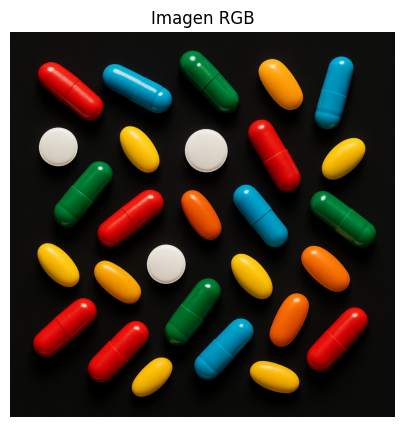

In [84]:
bgr = cv2.imread(IMG_PATH, cv2.IMREAD_COLOR)
if bgr is None:
    raise FileNotFoundError(f"No se pudo cargar la imagen: {IMG_PATH}")
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(rgb)
plt.title("Imagen RGB")
plt.axis("off")
plt.show()

Conversión a escala de grises.

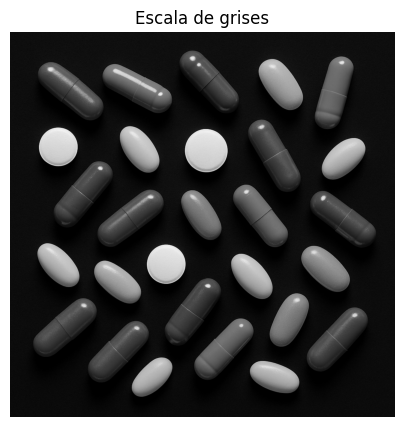

In [85]:
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(5,5))
plt.imshow(gray, cmap="gray")
plt.title("Escala de grises")
plt.axis("off")
plt.show()

Suavizado Gaussiano opcional para reducción de ruido.

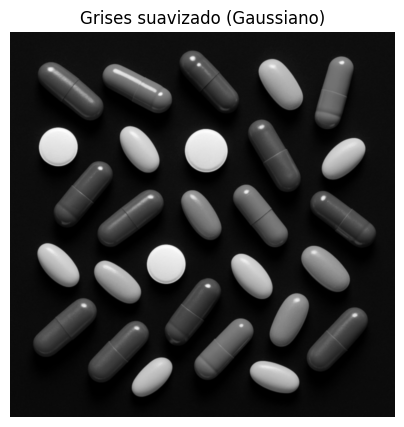

In [86]:
gray_blur = cv2.GaussianBlur(gray, (5,5), 0)
plt.figure(figsize=(5,5))
plt.imshow(gray_blur, cmap="gray")
plt.title("Grises suavizado (Gaussiano)")
plt.axis("off")
plt.show()

Umbralización binaria con Otsu (objeto claro sobre fondo oscuro).

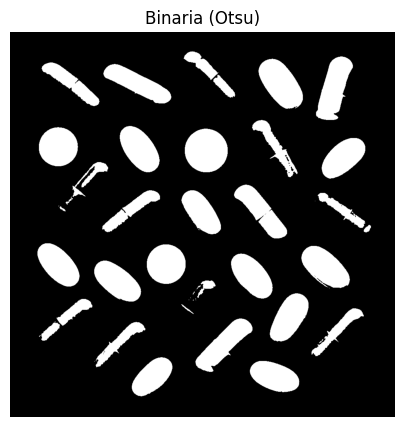

In [87]:
_, th = cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(5,5))
plt.imshow(th, cmap="gray")
plt.title("Binaria (Otsu)")
plt.axis("off")
plt.show()

Operaciones morfológicas: apertura para reducción de ruido; dilatación para fondo seguro.

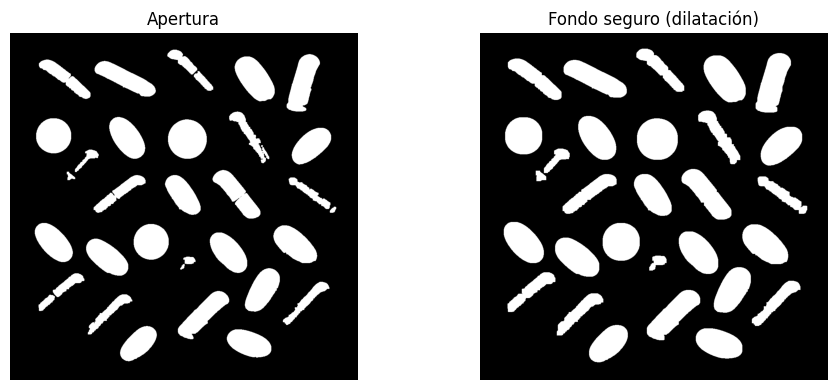

In [88]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1); ax1.imshow(opening, cmap="gray"); ax1.set_title("Apertura"); ax1.axis("off")
ax2 = fig.add_subplot(1,2,2); ax2.imshow(sure_bg, cmap="gray"); ax2.set_title("Fondo seguro (dilatación)"); ax2.axis("off")
plt.tight_layout(); plt.show()

Transformada de distancia y umbral para primer plano seguro.

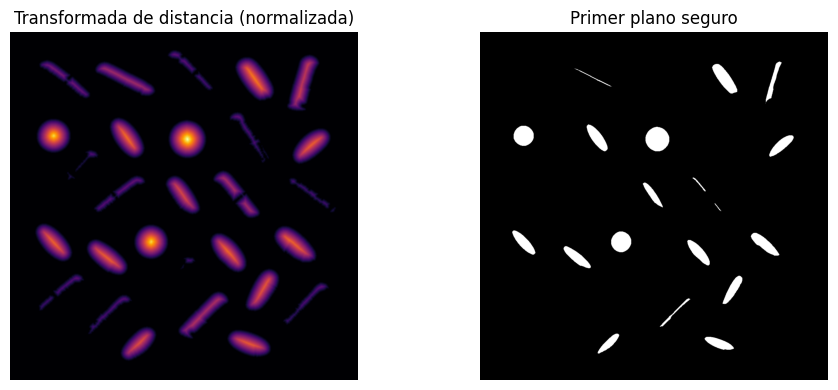

In [89]:
dist = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
dist_norm = cv2.normalize(dist, None, 0, 1.0, cv2.NORM_MINMAX)
_, sure_fg = cv2.threshold(dist, 0.4*dist.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1); ax1.imshow(dist_norm, cmap="inferno"); ax1.set_title("Transformada de distancia (normalizada)"); ax1.axis("off")
ax2 = fig.add_subplot(1,2,2); ax2.imshow(sure_fg, cmap="gray"); ax2.set_title("Primer plano seguro"); ax2.axis("off")
plt.tight_layout(); plt.show()

Región desconocida entre fondo y primer plano.

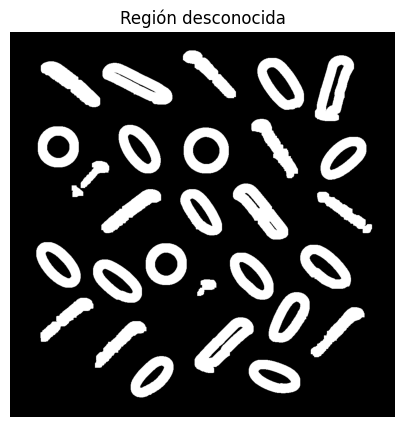

In [90]:
unknown = cv2.subtract(sure_bg, sure_fg)
plt.figure(figsize=(5,5))
plt.imshow(unknown, cmap="gray")
plt.title("Región desconocida")
plt.axis("off")
plt.show()

Etiquetas de marcadores mediante connectedComponents.

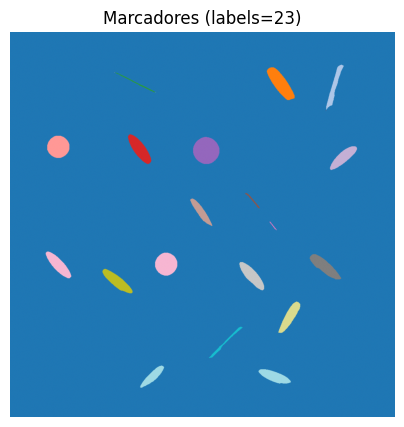

In [91]:
num_labels, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0
plt.figure(figsize=(5,5))
plt.imshow(markers, cmap="tab20")
plt.title(f"Marcadores (labels={num_labels})")
plt.axis("off")
plt.show()

Aplicación de cv2.watershed y visualización de bordes.

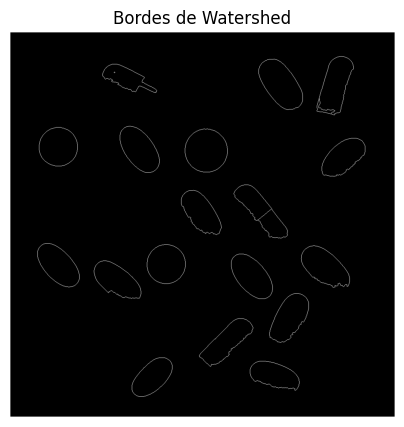

In [92]:
markers_ws = markers.copy()
markers_ws = cv2.watershed(bgr, markers_ws)
edges = (markers_ws == -1).astype(np.uint8) * 255
plt.figure(figsize=(5,5))
plt.imshow(edges, cmap="gray")
plt.title("Bordes de Watershed")
plt.axis("off")
plt.show()

Bordes superpuestos sobre RGB.

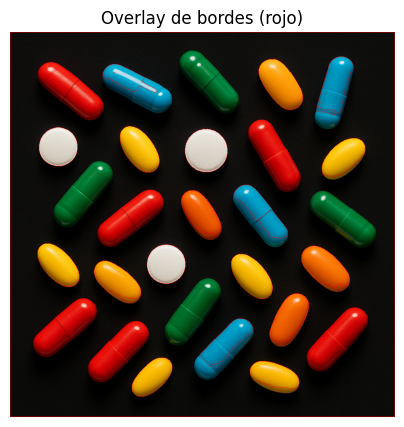

In [93]:
overlay = rgb.copy()
overlay[edges==255] = [255, 0, 0]
plt.figure(figsize=(5,5))
plt.imshow(overlay)
plt.title("Overlay de bordes (rojo)")
plt.axis("off")
plt.show()